In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.axes._axes as axes
sns.set()
import nltk
import string
import random

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [38]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
##
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense, \
    Embedding, GlobalAveragePooling1D, Bidirectional, LSTM, \
    BatchNormalization, Conv1D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model, Sequential


In [39]:
# setting global variables
dbBase = r"C:\Users\mhasa\Google Drive\Tutorial Corner\PYTH\PyCharm Projects\DeepLearning\research\nlp_subproject\top_100\combined_dataset\mcmaster_processed_lemmatised"
save_path = r"C:\Users\mhasa\AppData\Roaming\Autodesk\Autodesk Fusion 360\MyScripts\PureFlask_3JS_server\flask_app\nlp_model"

all_sentences = []
all_labels = []

In [40]:
# reading the words from file and creating a dataset
types = ['bearing', 'bolt', 'collet', 'spring', 'sprocket']
class_num = len(types)

for label, type in enumerate(types):

    with open(f"{dbBase}//{type}.txt", mode='r') as partFile:
        content = partFile.readlines()
        content = [c.replace("\n", "") for c in content]

        all_sentences.extend(content)
        all_labels.extend([label] * len(content))

all_sentences = np.array(all_sentences)
all_labels = np.array(all_labels)

In [41]:
# binarize the labels
le = LabelBinarizer()
all_labels = le.fit_transform(all_labels)

In [42]:
epoch_no = 25
vocab_size = 1300
embedding_dim = 16
max_length = 20
trunc_type = "post"
oov_tok = "<OOV>"
test_size = 0.25

In [43]:
# do a trin test split
train_sentences, \
test_sentences, \
trainy, \
testy = train_test_split(all_sentences,
                         all_labels,
                         stratify=all_labels,
                         test_size=test_size,
                         random_state=random.randint(1, 1000))


In [44]:
# tokenize the train set
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
train_sequences = tokenizer.texts_to_sequences(train_sentences)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length,
                                       truncating=trunc_type)
# tokenise and pad the test set
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# check out the word index
print(len(tokenizer.word_index.keys()))
print(tokenizer.word_index)

1311
{'<OOV>': 1, 'bear': 2, 'spring': 3, 'bolt': 4, 'use': 5, 'sprocket': 6, 'shaft': 7, 'chain': 8, 'load': 9, 'steel': 10, 'roller': 11, 'forc': 12, 'thread': 13, 'compress': 14, 'collet': 15, 'resist': 16, 'machin': 17, 'requir': 18, 'chuck': 19, 'workpiec': 20, 'screw': 21, 'head': 22, 'amount': 23, 'corros': 24, 'extend': 25, 'length': 26, 'rotat': 27, 'gear': 28, 'tool': 29, 'rate': 30, 'stainless': 31, 'nut': 32, 'motion': 33, 'also': 34, 'ball': 35, 'hold': 36, 'extens': 37, 'fasten': 38, 'end': 39, 'part': 40, 'made': 41, 'holder': 42, 'lubric': 43, 'tension': 44, 'maximum': 45, 'shield': 46, 'heat': 47, 'seal': 48, 'drive': 49, 'open': 50, 'size': 51, 'harder': 52, 'dust': 53, 'one': 54, 'high': 55, 'energi': 56, 'allow': 57, 'radial': 58, 'block': 59, 'teeth': 60, 'higher': 61, 'shape': 62, 'hex': 63, 'clamp': 64, 'diamet': 65, 'center': 66, 'jaw': 67, 'may': 68, 'taper': 69, 'wear': 70, 'bearings': 71, 'origin': 72, 'two': 73, 'make': 74, 'hole': 75, 'provid': 76, 'wheel':

In [45]:
# now construct the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_length))

# change here
#model.add(Flatten())

model.add(LSTM(8, return_sequences=False))
#model.add(Bidirectional(LSTM(16)))

# model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# model.add(GlobalAveragePooling1D())

# change ends here
model.add(Dense(units=5, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=class_num, activation="softmax"))

# compile the model
model.compile(loss="categorical_crossentropy",
              optimizer = 'adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 16)            20800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
batch_normalization_2 (Batch (None, 5)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
Total params: 21,695
Trainable params: 21,685
Non-trainable params: 10
_________________________________________________________________


In [46]:
H = model.fit(padded_train_sequences,
          trainy,
          epochs=epoch_no,
          validation_data=(padded_test_sequences, testy))

Train on 970 samples, validate on 324 samples
Epoch 1/25
970/970 [==============================] - 4s 4ms/sample - loss: 1.4865 - accuracy: 0.4113 - val_loss: 1.5870 - val_accuracy: 0.2531
Epoch 2/25
970/970 [==============================] - 0s 342us/sample - loss: 1.1503 - accuracy: 0.6814 - val_loss: 1.5517 - val_accuracy: 0.2840

In [47]:
epochs = range(1,epoch_no+1)
loss = H.history['loss']
accuracy = H.history['accuracy']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_accuracy']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy,val_loss,val_accuracy],
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

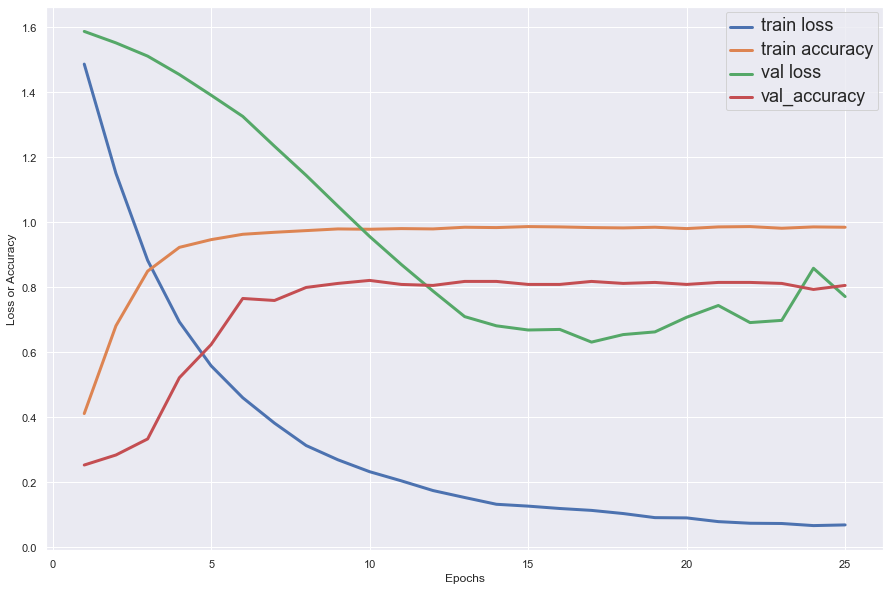

In [48]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,10))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

In [49]:

def print_confusion_matrix(confusion_matrix,
                           class_names,
                           figsize = (10,7),
                           fontsize=12, normalize=True):



    # if normalize:
    #     confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')


    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)


    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='viridis')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
# evaluate the network
print ( "[INFO] evaluating network..." )
predictions = model.predict(padded_test_sequences)
print (classification_report(testy.argmax(axis=1 ),
predictions.argmax(axis=1 ), target_names=types))

[INFO] evaluating network...
              precision    recall  f1-score   support

     bearing       0.91      0.68      0.78        73
        bolt       0.74      0.82      0.78        62
      collet       0.92      0.85      0.88        52
      spring       0.76      0.89      0.82        80
    sprocket       0.78      0.79      0.78        57

    accuracy                           0.81       324
   macro avg       0.82      0.81      0.81       324
weighted avg       0.82      0.81      0.81       324



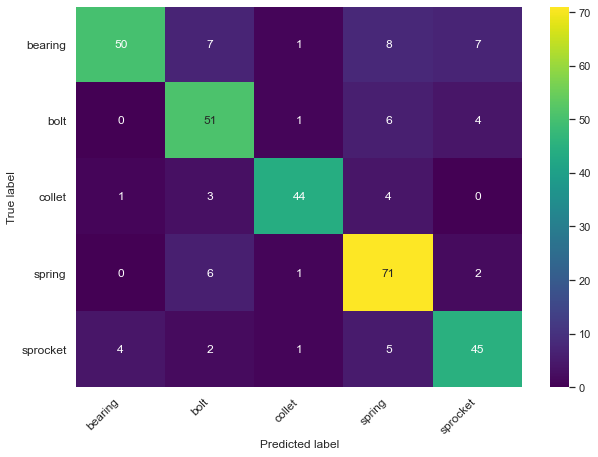

In [51]:
cm = confusion_matrix(testy.argmax(axis=1),
                      predictions.argmax(axis=1),
                      )
print_confusion_matrix(cm, types)

In [52]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, padded_test_sequences, testy ,
                                 display_labels=types,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

print(disp.confusion_matrix)

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:

train_sentences, \
test_sentences, \
trainy, \
testy














In [ ]:
# save the model
save_path = r"C:\Users\mhasa\AppData\Roaming\Autodesk\Autodesk Fusion 360\MyScripts\PureFlask_3JS_server\flask_app\nlp_model"
model.save(f"{save_path}\\nlp_model_mcmaster_stemmed_simpler1.h5",
           overwrite=True)

In [67]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights.shape)

(1300, 16)


In [68]:
reverse_word_index = dict([(val, key)
                           for (key, val) in tokenizer.word_index.items()])

In [69]:
import io

out_v = io.open('vecs1.tsv', 'w', encoding='utf-8')
out_m = io.open('meta1.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = embedding_weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [70]:
# save my embedding matrix
out_e = io.open('embed_matrix1.txt', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = embedding_weights[word_num]
  out_str = word + '\t' + '\t'.join([str(x) for x in embeddings]) + "\n"
  out_e.write(out_str)
out_e.close()

### Below we have load model and test model protocols


In [71]:
import pickle

# saving
with open(f'{save_path}//tokenizer_mcmaster_stemmed1.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [73]:
# loading the tokenizer
import pickle

with open(f'{save_path}//tokenizer_mcmaster_stemmed1.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [74]:
loaded_model = load_model(f"{save_path}//nlp_model_mcmaster_stemmed_simpler1.h5")


In [75]:
# remove unwanted words then stem
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stopwords_english = stopwords.words("english")

In [76]:
def preprocess(sent_:str):

    # remove any leading space
    sent_ = sent_.lstrip(" ").lower()
    words_in_sent_ = sent_.split(" ")

    # now remove stopwords and punctuation from sentence
    words_to_allow_from_sent_ = []
    for word in words_in_sent_:
        if (word not in stopwords_english and word not in punctuation):
            words_to_allow_from_sent_.append(word)

    # now stem the words
    words_to_allow_from_sent_stemmed = []
    for word in words_to_allow_from_sent_:
        stem_word = stemmer.stem(word)
        words_to_allow_from_sent_stemmed.append(stem_word)

    # finally reconstruct the sentence
    final_cleaned_sentence = " ".join(words_to_allow_from_sent_stemmed)
    return final_cleaned_sentence



In [77]:
user_query = "something that can be used to hold workpiece in cnc machine"
sample_text = [preprocess(user_query)]
sample_text_array = np.asarray(sample_text)

In [78]:
sample_text_sequence = loaded_tokenizer.texts_to_sequences(sample_text_array)
padded_sample_sequence = pad_sequences(sample_text_sequence, maxlen=max_length)
padded_sample_sequence

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   6,  33,  22, 434,  18]])

In [79]:
types = ['Bearings', 'Bolts', 'Collets', 'Springs', 'Sprockets']
pred = loaded_model.predict(padded_sample_sequence)
index = np.argmax(pred)
queried_part = types[int(index)]
print(f"Queried part is: {queried_part}")

Queried part is: Collets


In [3]:

stemmer = nltk.stem.PorterStemmer()
stopwords_english = nltk.corpus.stopwords.words("english")


def stem_preprocess(sent_: str):
    # remove punctuation
    for punc in string.punctuation:
        if punc in sent_:
            sent_ = sent_.replace(punc, "")

    # remove any leading space
    sent_ = sent_.lstrip(" ").lower()
    words_in_sent_ = sent_.split(" ")

    # now remove stopwords from sentence
    words_to_allow_from_sent_ = []
    for word in words_in_sent_:
        if word not in stopwords_english and word not in string.punctuation:
            words_to_allow_from_sent_.append(word)

    # now stem the words
    words_to_allow_from_sent_stemmed = []
    for word in words_to_allow_from_sent_:
        stem_word = stemmer.stem(word)
        words_to_allow_from_sent_stemmed.append(stem_word)

    # finally reconstruct the sentence
    final_cleaned_sentence = " ".join(words_to_allow_from_sent_stemmed)
    return final_cleaned_sentence

In [4]:
print(stem_preprocess("Absorbs energy and shock, deforms under load!!!!!"))

absorb energi shock deform load
